In [1312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1313]:
movie_reviews_df = pd.read_csv("movie_review_data.csv")

In [1314]:
movie_reviews_df.shape

(5043, 28)

In [1315]:
#Remove duplicate rows
movie_reviews_df.drop_duplicates(keep = 'first', inplace = True)

In [1316]:
movie_reviews_df.shape

(4998, 28)

In [1317]:
movie_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 28 columns):
color                        4979 non-null object
director_name                4895 non-null object
num_critic_for_reviews       4949 non-null float64
duration                     4983 non-null float64
director_facebook_likes      4895 non-null float64
actor_3_facebook_likes       4975 non-null float64
actor_2_name                 4985 non-null object
actor_1_facebook_likes       4991 non-null float64
gross                        4124 non-null float64
genres                       4998 non-null object
actor_1_name                 4991 non-null object
movie_title                  4998 non-null object
num_voted_users              4998 non-null int64
cast_total_facebook_likes    4998 non-null int64
actor_3_name                 4975 non-null object
facenumber_in_poster         4985 non-null float64
plot_keywords                4846 non-null object
movie_imdb_link              4998 non-

In [1318]:
movie_reviews_df["content_rating"].replace(["M","GP"],"PG",inplace = True) 
movie_reviews_df["content_rating"].replace("X","NC-17",inplace= True)
movie_reviews_df["content_rating"].replace("Not Rated","Unrated",inplace= True)
movie_reviews_df["content_rating"].replace(["Approved","TV-14","NC-17","TV-MA","TV-PG","TV-G","Passed","TV-Y","TV-Y7"]\
                                          ,"Other",inplace = True)

In [1319]:
#Replace missing values with "R" (most frequently occuring rating)
movie_reviews_df.loc[movie_reviews_df["content_rating"].isna(),["content_rating"]] = "R"

In [1320]:
#Add new features for profit and profit_percent
movie_reviews_df["profit"] = movie_reviews_df["gross"] - movie_reviews_df["budget"]
movie_reviews_df["profit_percent"] = movie_reviews_df["profit"]/movie_reviews_df["budget"]

In [1321]:
movie_reviews_df["color"].value_counts()

Color               4772
 Black and White     207
Name: color, dtype: int64

Most of the movies (>95%) are color movies, indicating this feature is nearly constant. This feature can potentially 
be ignored.

In [1322]:
movie_reviews_df.loc[movie_reviews_df["color"].isna(),["color"]] = "Color"

In [1323]:
def convert_to_other_language(language):
    if language!= "English":
        return "Other_language"
    else:
        return "English"
movie_reviews_df['language'] = movie_reviews_df.apply(lambda row: convert_to_other_language(row["language"]),axis = 1)

In [1324]:
movie_reviews_df['language'].value_counts().head(5)

English           4662
Other_language     336
Name: language, dtype: int64

In [1325]:
movie_reviews_df.loc[movie_reviews_df["language"].isna(),["language"]] = "English"

In [1326]:
def convert_to_other_country(country):
    if country!= "UK" and country!= "USA":
        return "Other_country"
    else:
        return country
movie_reviews_df['country'] = movie_reviews_df.apply(lambda row: convert_to_other_country(row["country"]),axis = 1)

In [1327]:
movie_reviews_df['country'].value_counts()

USA              3773
Other_country     782
UK                443
Name: country, dtype: int64

In [1328]:
movie_reviews_df.loc[movie_reviews_df["country"].isna(),["country"]] = "USA"

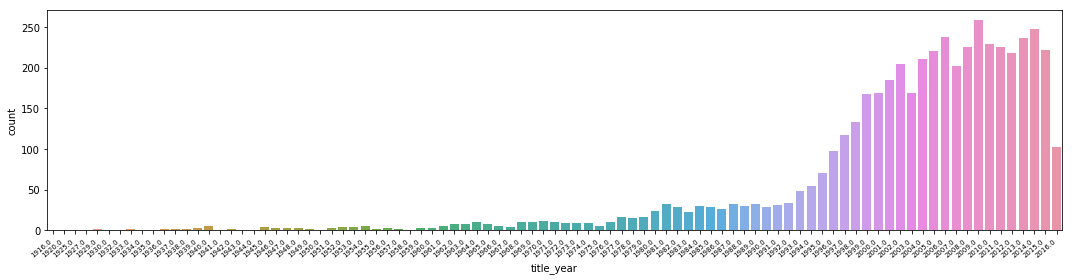

In [1329]:
plt.figure(figsize=(15,4)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x="title_year", data=movie_reviews_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

As we can see from the above plot, there are very few movies in our dataset that have a title_year before 1980. Hence it may be a good idea to create a feature to indicate age of the movie, so that time based trends are accounted for.

In [1330]:
top_10_movies_by_profit = movie_reviews_df.sort_values(by ='profit', ascending = 0).loc[:,["movie_title","profit","budget"]].head(10)
top_20_movies_by_profit_percent = movie_reviews_df.sort_values(by ='profit_percent', ascending = 0).loc[:,["movie_title","profit_percent","profit","budget"]].head(20)

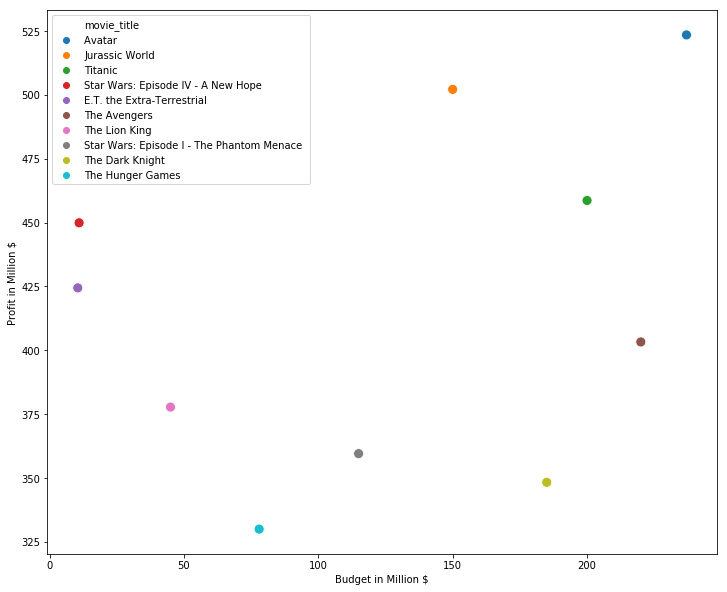

In [1331]:
plt.figure(figsize=(12,10)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.scatterplot(x = top_10_movies_by_profit["budget"]/1000000
            ,y = top_10_movies_by_profit["profit"]/1000000
            ,data = top_10_movies_by_profit
            ,hue = "movie_title"
            ,s = 100)

ax.set(xlabel="Budget in Million $", ylabel="Profit in Million $")
plt.legend(loc = "upper left")
plt.show()

In general we notice from the above scatterplot that that typically movies with higher profit are also high budget movies. But there are some exceptions to this trend like (Lion king) and (ET the extra terrestrial)

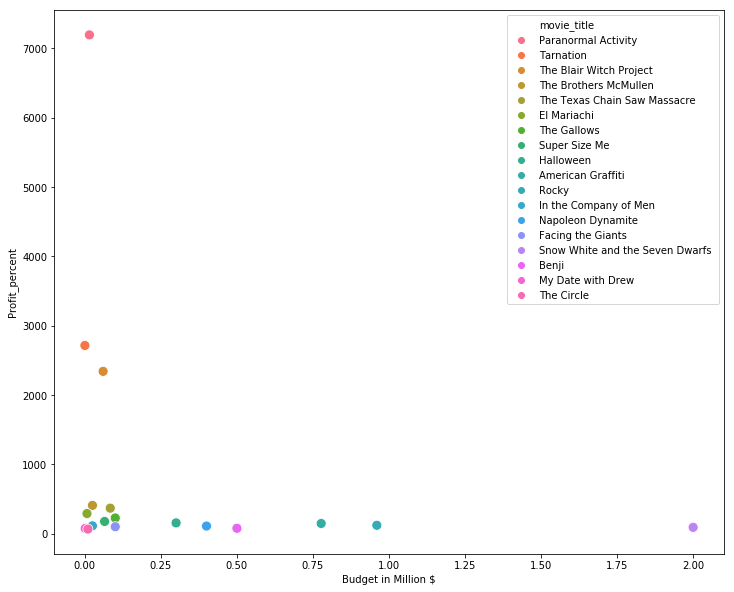

In [1332]:
plt.figure(figsize=(12,10)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.scatterplot(x = top_20_movies_by_profit_percent["budget"]/1000000
            ,y = top_20_movies_by_profit_percent["profit_percent"]
            ,data = top_20_movies_by_profit_percent
            ,hue = "movie_title"
            ,s = 100)

ax.set(xlabel="Budget in Million $", ylabel="Profit_percent")
plt.legend(loc = "upper right")
plt.show()

In [1333]:
director_with_rating_count = movie_reviews_df.groupby('director_name')['imdb_score'].agg(['mean','count'])
director_with_rating_count_top_10 = director_with_rating_count.loc[director_with_rating_count["count"]>5].sort_values(by = "mean",ascending = 0).head(10)
director_with_rating_count_top_10

,mean,count
director_name,,
Christopher Nolan,8.425000,8
Quentin Tarantino,8.200000,8
Stanley Kubrick,8.000000,7
James Cameron,7.914286,7
Alejandro G. Iñárritu,7.783333,6
David Fincher,7.750000,10
Peter Jackson,7.675000,12
Martin Scorsese,7.660000,20
Wes Anderson,7.628571,7


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


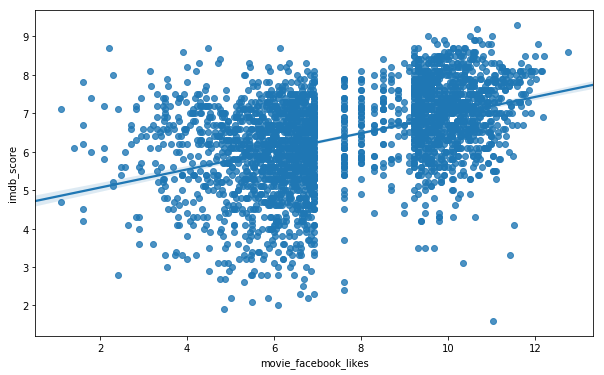

In [1334]:
#Relation between movie facebook likes and imdb_score
plt.figure(figsize=(10,6)) 
ax = sns.regplot(x = np.log(movie_reviews_df.loc[movie_reviews_df["movie_facebook_likes"]!=0]["movie_facebook_likes"]+1),y = "imdb_score", 
                     data = movie_reviews_df.loc[movie_reviews_df["movie_facebook_likes"]!=0])
plt.show()

Movies with very high facebook likes tend to have a high imdb_score whereas for movies with low facebook likes, the imdb scores don't show any particular trend and are spread between high to low scores.

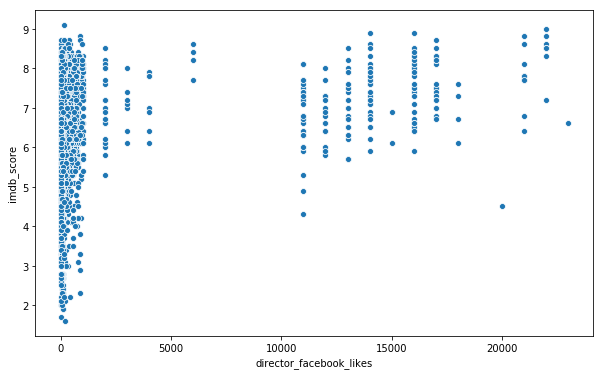

In [1335]:
#Relation between director facebook likes and imdb_score
plt.figure(figsize=(10,6)) 
ax = sns.scatterplot(x = "director_facebook_likes",y = "imdb_score", 
                     data = movie_reviews_df.loc[(movie_reviews_df["director_facebook_likes"].isna() == False) & (movie_reviews_df["director_facebook_likes"] !=0)])
plt.show()

Although there is not a strong trend of consistently higher imdb scores for directors with more facebook likes, we do observe that directors with higher number of facebook likes typically don't have movies that perform very poorly (ie <5 imdb rating).

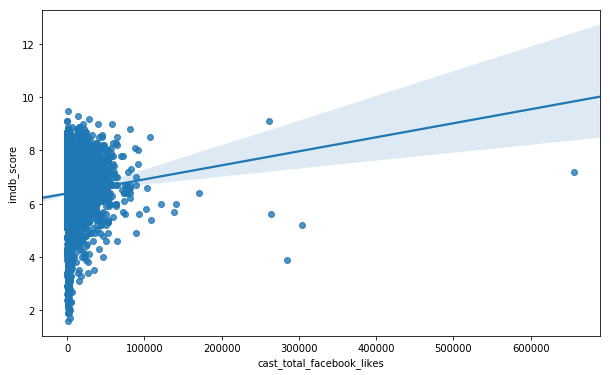

In [1336]:
#Relation between movie facebook likes and imdb_score
plt.figure(figsize=(10,6)) 
ax = sns.regplot(x = "cast_total_facebook_likes",y = "imdb_score", 
                     data = movie_reviews_df)
plt.show()

We see a slightly upward sloping regression line for the total facebook likes of cast versus the imdb_score. Although it's not a strong upward trend, the total facebook likes of cast seems to have a skewed distribution with most movies having a total cast likes in the range less than 100,000 and a few movies having very large likes for the cast members.

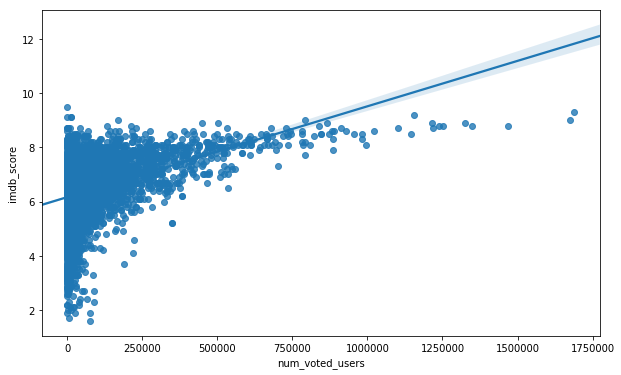

In [1337]:
#Relation between movie facebook likes and imdb_score
plt.figure(figsize=(10,6)) 
ax = sns.regplot(x = "num_voted_users",y = "imdb_score", 
                     data = movie_reviews_df)
plt.show()

We see a somewhat strong upward trend in the regression line between number of users who voted vs imdb score of the movie. This intuitively makes sense since very popular movies tend to garner a lot of votes from users (And typically high ratings thereby reflecting in higher imdb score).

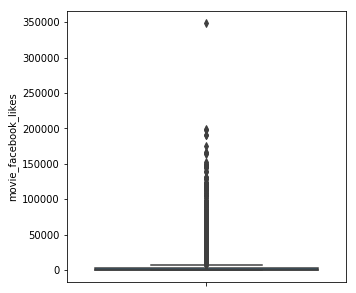

In [1338]:
plt.figure(figsize=(5,5))
sns.boxplot(y = movie_reviews_df['movie_facebook_likes'])

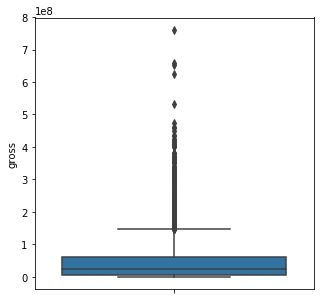

In [1339]:
plt.figure(figsize=(5,5))
sns.boxplot(y = movie_reviews_df['gross'])

In [1340]:
#Log transform the variables with extremely skewed distribution
movie_reviews_df['gross'] = np.log(movie_reviews_df['gross']+1)
movie_reviews_df['budget'] = np.log(movie_reviews_df['budget']+1)
movie_reviews_df['movie_facebook_likes'] = np.log(movie_reviews_df['movie_facebook_likes']+1)
movie_reviews_df['director_facebook_likes'] = np.log(movie_reviews_df['director_facebook_likes']+1)
movie_reviews_df['cast_total_facebook_likes'] = np.log(movie_reviews_df['cast_total_facebook_likes']+1)

In [1341]:
movie_reviews_df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,profit_percent
num_critic_for_reviews,1.000000,0.257529,0.173435,0.265591,0.189533,0.408791,0.624255,0.338254,-0.035380,0.608175,0.394412,0.276845,0.280421,0.307226,-0.050243,0.364584,0.039550,0.033048
duration,0.257529,1.000000,0.127806,0.119806,0.087567,0.210127,0.313935,0.189366,0.014060,0.328413,0.333109,-0.137076,0.129660,0.262618,-0.090680,0.075640,0.008458,-0.032463
director_facebook_likes,0.173435,0.127806,1.000000,0.064321,0.089761,0.151032,0.149725,0.185319,-0.012456,0.085706,0.185723,-0.049278,0.100006,0.125088,-0.021587,0.025553,0.000354,-0.000851
actor_3_facebook_likes,0.265591,0.119806,0.064321,1.000000,0.250000,0.186549,0.277918,0.360373,0.098381,0.225871,0.204865,0.095383,0.556366,0.051683,-0.003095,0.138921,0.048038,-0.012292
actor_1_facebook_likes,0.189533,0.087567,0.089761,0.250000,1.000000,0.147830,0.191239,0.512247,0.070709,0.144768,0.169250,0.086286,0.389749,0.075952,-0.020262,0.043410,0.028130,-0.015523
gross,0.408791,0.210127,0.151032,0.186549,0.147830,1.000000,0.424070,0.395784,-0.013016,0.398940,0.585916,-0.043495,0.191519,0.075107,0.072521,0.071834,0.137338,0.016555
num_voted_users,0.624255,0.313935,0.149725,0.277918,0.191239,0.424070,1.000000,0.317684,-0.029861,0.798691,0.323992,0.007232,0.265317,0.411299,-0.014510,0.297355,0.124928,0.010534
cast_total_facebook_likes,0.338254,0.189366,0.185319,0.360373,0.512247,0.395784,0.317684,1.000000,0.101083,0.269116,0.469001,0.105414,0.453027,0.015156,-0.023349,0.086232,0.070319,-0.054957
facenumber_in_poster,-0.035380,0.014060,-0.012456,0.098381,0.070709,-0.013016,-0.029861,0.101083,1.000000,-0.070540,0.025467,0.061065,0.069052,-0.064403,0.013928,0.001691,0.011895,-0.013327
num_user_for_reviews,0.608175,0.328413,0.085706,0.225871,0.144768,0.398940,0.798691,0.269116,-0.070540,1.000000,0.316854,-0.002355,0.217153,0.292745,-0.024867,0.173764,0.096949,0.068372


Following are medium to highly correlated fields:

1) num_voted users & num_critics for reviews : 0.62

2) num_users_for_reviews & num_critics_for_reviews: 0.61

3) gross & budget: 0.58

4) num_user_for_reviews & num_voted_users: 0.798

Since we will primarily be using tree based methods these correlations shouldn't impact the model performance.

In [1342]:
genres = movie_reviews_df['genres'].str.get_dummies(sep='|',)
#genres_to_keep = ["Horror","Biography","War","History","Documentary"]
#genres = genres[genres_to_keep]
movie_reviews_df = pd.merge(movie_reviews_df,genres,left_index = True, right_index = True)

In [1343]:
countries = movie_reviews_df['country'].str.get_dummies(sep=', ',)
movie_reviews_df = pd.merge(movie_reviews_df, countries, left_index=True, right_index=True)
languages = movie_reviews_df['language'].str.get_dummies(sep=', ',)
movie_reviews_df = pd.merge(movie_reviews_df, languages, left_index=True, right_index=True)
content_rating = movie_reviews_df['content_rating'].str.get_dummies(sep=', ',)
movie_reviews_df = pd.merge(movie_reviews_df, content_rating, left_index=True, right_index=True)

In [1344]:
#from sklearn.feature_extraction.text import CountVectorizer
#movie_reviews_df["plot_keywords"]=movie_reviews_df["plot_keywords"].fillna("None")

#def token(text):
#    return(text.split("|"))

#cv=CountVectorizer(max_features=200,tokenizer=token )
#plot_keywords_words=cv.fit_transform(movie_reviews_df["plot_keywords"])

#plot_keywords_words=plot_keywords_words.toarray()

#words = cv.get_feature_names()
#words=["Keyword_"+w for w in words]

#keywords=pd.DataFrame(plot_keywords_words, columns=words)

#keys=[w for w in words if keywords[w].sum()>50] 

#movie_reviews_df = pd.merge(movie_reviews_df, keywords[keys],left_index = True, right_index = True)

In [1345]:
from datetime import date
current_year = date.today().year
movie_reviews_df["age_of_movie_in_years"] = current_year - movie_reviews_df["title_year"]

In [1346]:
movie_reviews_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'profit',
       'profit_percent', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Other_country', 'UK', 'USA', 'English',
       'Other_language', 'G', 'Other', 'PG', 'PG-13', 'R

In [1347]:
movie_reviews_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,USA,English,Other_language,G,Other,PG,PG-13,R,Unrated,age_of_movie_in_years
count,4949.000000,4983.000000,4895.000000,4975.000000,4991.000000,4124.000000,4.998000e+03,4998.000000,4985.000000,4977.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4891.000000
mean,139.890079,107.213325,3.667246,639.900905,6556.939892,16.379267,8.347020e+04,8.105689,1.368907,272.014667,...,0.754902,0.932773,0.067227,0.022409,0.031613,0.141857,0.288916,0.479992,0.035214,17.531180
std,121.477586,25.248775,2.404086,1643.298282,15061.586700,2.326555,1.380866e+05,1.736436,2.014623,377.776210,...,0.430188,0.250440,0.250440,0.148024,0.174984,0.348938,0.453304,0.499650,0.184339,12.475235
min,1.000000,7.000000,0.000000,0.000000,0.000000,5.093750,5.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,50.000000,93.000000,2.079442,133.000000,611.500000,15.484129,8.560000e+03,7.248859,0.000000,64.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,110.000000,103.000000,3.912023,369.000000,984.000000,17.052059,3.426050e+04,8.034793,1.000000,156.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,195.000000,118.000000,5.262690,635.000000,11000.000000,17.947784,9.612075e+04,9.528175,2.000000,324.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,21.000000
max,813.000000,511.000000,10.043293,23000.000000,640000.000000,20.449494,1.689764e+06,13.395030,43.000000,5060.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,104.000000


In [1348]:
#Fill missing values with "-99999" - For XGBoost we let the model's default missing value imputation work on data
movie_reviews_df.loc[movie_reviews_df["num_critic_for_reviews"].isna(),["num_critic_for_reviews"]] = -99999
movie_reviews_df.loc[movie_reviews_df["duration"].isna(),["duration"]] = -99999
movie_reviews_df.loc[movie_reviews_df["director_facebook_likes"].isna(),["director_facebook_likes"]] = -99999
movie_reviews_df.loc[movie_reviews_df["director_facebook_likes"] == 0,["director_facebook_likes"]] = -99999
movie_reviews_df.loc[movie_reviews_df["gross"].isna(),["gross"]] = -99999
movie_reviews_df.loc[movie_reviews_df["cast_total_facebook_likes"] == 0,["cast_total_facebook_likes"]] = -99999
movie_reviews_df.loc[movie_reviews_df["facenumber_in_poster"].isna(),["facenumber_in_poster"]]  = -99999
movie_reviews_df.loc[movie_reviews_df["num_user_for_reviews"].isna(),["num_user_for_reviews"]] = -99999
movie_reviews_df.loc[movie_reviews_df["budget"].isna(),["budget"]] = -99999
movie_reviews_df.loc[movie_reviews_df["title_year"].isna(),["title_year"]]  = -99999
movie_reviews_df.loc[movie_reviews_df["movie_facebook_likes"] == 0,["movie_facebook_likes"]] = -99999
movie_reviews_df.loc[movie_reviews_df["aspect_ratio"].isna(),["aspect_ratio"]] = -99999
movie_reviews_df.loc[movie_reviews_df["age_of_movie_in_years"].isna(),["age_of_movie_in_years"]] = -99999

In [1349]:
#Fields to drop
drop_cols = ["color","director_name","actor_2_name","actor_1_name","movie_title","actor_3_name","plot_keywords",
             "movie_imdb_link","language","country","content_rating","title_year","actor_1_facebook_likes",
             "actor_2_facebook_likes","actor_3_facebook_likes","profit","profit_percent","genres"]
movie_reviews_df = movie_reviews_df.drop(drop_cols,axis=1)

In [1350]:
y = movie_reviews_df["imdb_score"]
X = movie_reviews_df.drop(["imdb_score"],axis = 1)

In [1351]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [1352]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(n_estimators = 400,colsample_bytree = 0.5, learning_rate = 0.1, missing_value = -99999,
                          early_stopping_rounds = 20, max_depth = 6)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:17:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [1353]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("Mean absolute error = " , mean_absolute_error(y_test,preds))
print("Root mean-squared error = " ,np.sqrt(mean_squared_error(y_test,preds)))

Mean absolute error =  0.48067970032691953
Root mean-squared error =  0.6787256872410605


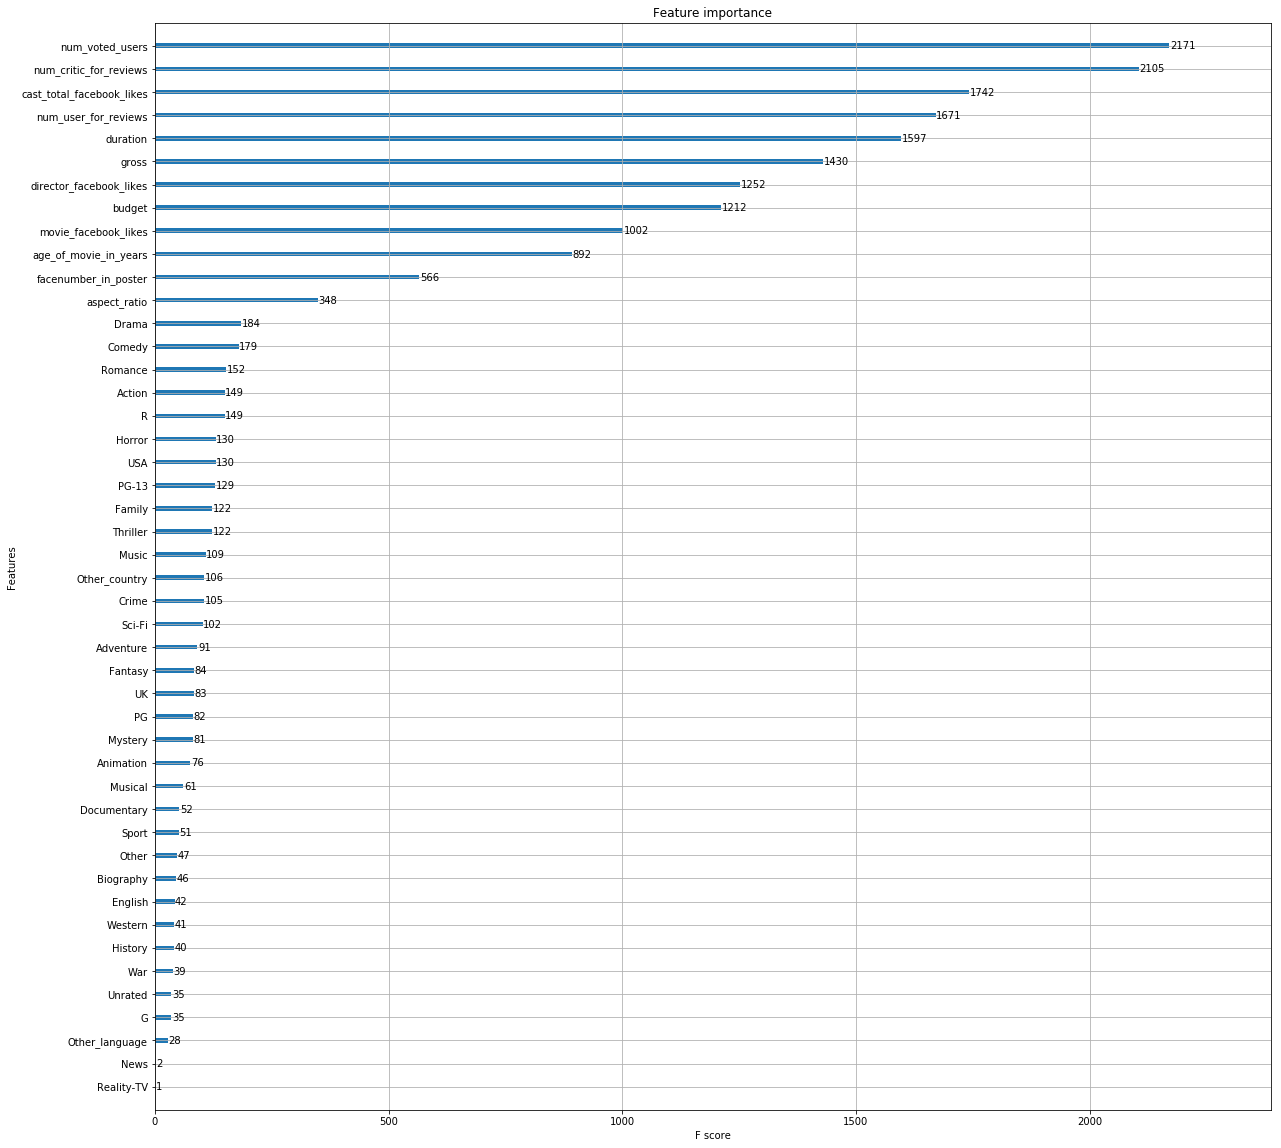

In [1354]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

In [1356]:
from sklearn.model_selection import GridSearchCV
xgb1 = xgb.XGBRegressor()
parameters = {'learning_rate': [0.01,0.05,0.1], #so called `eta` value
              'max_depth': [6,7,8],
              'colsample_bytree': [0.3,0.5],
              'n_estimators': [100,300,500,1000],
              'missing_value':[-99999]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X,y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  6.7min
[Parallel(n_jobs=5)]: Done 216 out of 216 | elapsed:  7.9min finished
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[20:33:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.5530041103439187
{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 6, 'missing_value': -99999, 'n_estimators': 1000}


In [1357]:
xg_reg_final = xgb.XGBRegressor(n_estimators = 1000,colsample_bytree = 0.5, learning_rate = 0.01, missing_value = -99999,
                                max_depth = 6)
xg_reg_final.fit(X_train,y_train)
preds_final = xg_reg_final.predict(X_test)

[20:44:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [1358]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("Mean absolute error = " , mean_absolute_error(y_test,preds))
print("Root mean-squared error = " ,np.sqrt(mean_squared_error(y_test,preds)))

Mean absolute error =  0.48067970032691953
Root mean-squared error =  0.6787256872410605


In [1303]:
#Let us impute missing value with mean before running elastic net and random forest
movie_reviews_df = movie_reviews_df.replace(-99999,np.NaN)
#Impute missing values as mean for float variables and mode for other variables
movie_reviews_df = movie_reviews_df.apply(lambda x: x.fillna(x.mean()) if x.dtype == 'float'\
                            else x.fillna(x.value_counts().index[0]))

In [1304]:
#Build elastic net regression
from sklearn.linear_model import ElasticNet
elastic_net_reg = ElasticNet(normalize = True, random_state = 100)
elastic_net_reg.fit(X_train,y_train)
preds_elastic_net = elastic_net_reg.predict(X_test)

In [1306]:
#Print out error on test set
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("Mean aboslute error = ", mean_absolute_error(y_test,preds_elastic_net))
print("Root mean-squared error = ",np.sqrt(mean_squared_error(y_test,preds_elastic_net)))

Mean aboslute error =  0.8722174087043523
Root mean-squared error =  1.1154061734179914


In [1359]:
#Build random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, max_features = "sqrt")
rf_reg.fit(X_train,y_train)
preds_rf = rf_reg.predict(X_test)

In [1360]:
print("Mean absolute error = " ,mean_absolute_error(y_test,preds_rf))
print("Mean squared error = " ,np.sqrt(mean_squared_error(y_test,preds_rf)))

Mean absolute error =  0.5100588000000001
Mean squared error =  0.7116170831563847


                                     Summary of results


| Model_type    | Mean Absolute Error | Root mean squared error |
| ----------    | ------------------- | ----------------------- |
| Elastic net   | 0.872               | 1.15                    |
| Random forest | 0.51                | 0.712                   |
| XGBoost       | 0.48                | 0.678                   |

From the above results it is clear that XGBoost provides the best performance both in terms of MAE and RMSE.

Below is the list of top variables from the variable importance chart:

1) num_voted_users: The popularity (imdb_score) of a movie is primarily determined by the number of people who rated it. This intuitively makes sense as both good and bad movies would typically elicit a good or bad response from people and correspondingly would have a high or low rating.

2) num_critic_for_reviews: The number of critical reviews also seems to a strong predictor of imdb_score

3) cast_total_facebook_likes: This again is in line with what we would expect ie a movie which has a popular cast with a lot of facebook likes would typically be expected to have a higher imdb_score.

4) num_user_for_reviews: This is a strong predictor of imdb_ratings. This may be explained by the fact that typically users would take the time out to write a review for a good movie or a really bad movie. Hence it makes sense that this is high up in the variable importance chart.

5) gross: Movies that gross higher would typically have a higher imdb rating and viceversa.

6) director_facebook_likes: Popular directors would typically have more facebook likes and would typically produce higher rated movies (Ex: Christopher Nolan, Tarantino)

7) age_of_movie_in_years: It is interesting to note that the feature we created to indicate age of the movie features in the top 10. Hence it is an indication that there are changing trends/patterns with time, which is being captured by this variable.